# Comparison of TSNE UMAP and LargeVis

#### Wiktoria Paluch

In [1]:
import sklearn.datasets
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

###   t-SNE, UMAP and LargeVis

##### t-SNE: T-distributed Stochastic Neighbor Embedding

t-SNE is a tool to visualize high-dimensional data. It converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data. t-SNE has a cost function that is not convex, i.e. with different initializations we can get different results. Source: https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html



##### UMAP: Uniform Manifold Approximation and Projection for Dimension Reduction

Uniform Manifold Approximation and Projection (UMAP) is a dimension reduction technique that can be used for visualisation similarly to t-SNE, but also for general non-linear dimension reduction. 
Source: https://umap-learn.readthedocs.io/en/latest/index.html


##### LargeVis

LargeVis is a clever method that allows a t-SNE like visualization using stochastic gradient descent, which scales much better than the Barnes-Hut approximation to t-SNE. LargeVis does not minimize the same cost function as t-SNE, but it is similar. 
Source: https://github.com/lferry007/LargeVis




In [3]:
from sklearn.manifold import TSNE
import umap

To get data we use the sklearn.datasets.fetch_openml method, which as the name requires, Fetch dataset from openml by name or dataset id. We will use MNIST and Fashion-MNIST(Zalando's article images). Fashion-MNIST is intended to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. Instead of numbers it contains thumbnails of clothes images.

In [4]:
mnist = sklearn.datasets.fetch_openml('mnist_784')
fmnist = sklearn.datasets.fetch_openml('Fashion-MNIST')

In [5]:
from sklearn.model_selection import train_test_split
X_mnist, x_mtest, y_mnist, y_mtest = train_test_split(mnist.data, mnist['target'], test_size=0.8, random_state=80)
X_fmnist, x_ftest, y_fmnist, y_ftest = train_test_split(fmnist.data, fmnist['target'], test_size=0.8, random_state=80)



In [6]:
X_mnist

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
23376,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14856,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36520,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59892,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51586,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55299,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Below are drawings of some samples from mnist and fmnist data sets

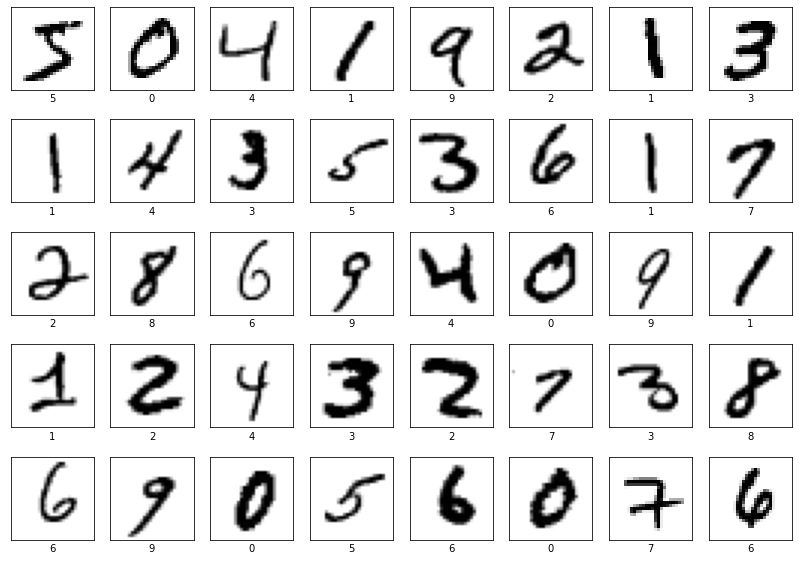

In [6]:
mnist_names = [i for i in range(10)]
 
plt.figure(figsize=(14,10))
for i in range(40):
    plt.subplot(5, 8, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(mnist.data.loc[i].values.reshape((28, 28)), cmap=plt.cm.binary)
    plt.xlabel(mnist_names[int(mnist.target[i])])
plt.show()

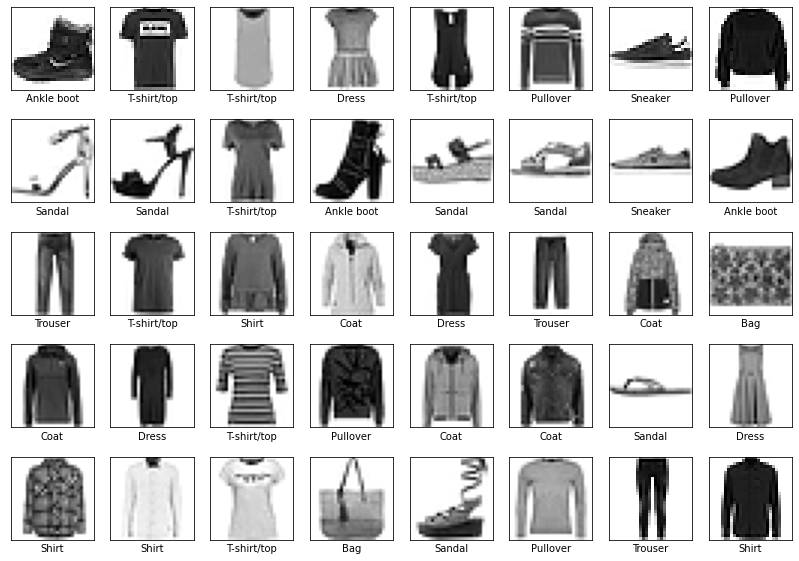

In [7]:
fmnist_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
 
plt.figure(figsize=(14,10))
for i in range(40):
    plt.subplot(5, 8, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(fmnist.data.loc[i].values.reshape((28, 28)), cmap=plt.cm.binary)
    plt.xlabel(fmnist_names[int(fmnist.target[i])])
plt.show()

#### Use t-SNE, UMAP and LargeVis to project mnist and fmnist data sets into a 2-dimensional space. For LargeVis, you need to create a function that saves the data to the required by LargeVis txt file format, and a function that loads the resulting file. Draw charts for all visualizations.

 ### Metoda tsne:
Relevant information is found at the relative distances between points of low dimensions. The TSNE captures structure in the sense that adjacent points in the input space tend to be neighbors in the low dimensional space.

The tSNE method made it possible to separate the observations. When viewed within clusters, similar observations are usually grouped together (numbers "1,2,6,7"). In addition, points that show up in the "wrong" cluster are sometimes mislabeled in the original dataset or written ambiguously (eg something between "4" and "9").

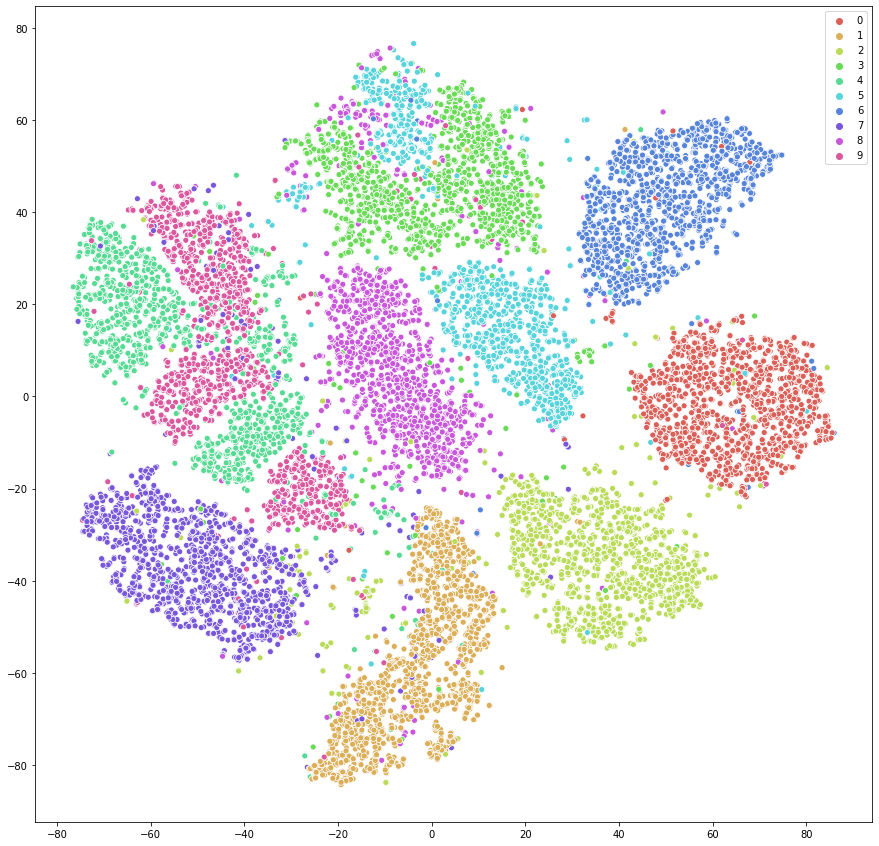

In [6]:
from sklearn.manifold import TSNE
import seaborn as sns


tsne = TSNE(n_components = 2, random_state=0)
tsne_res = tsne.fit_transform(X_mnist)
fig, ax = plt.subplots(figsize=(15,15))  
sns.scatterplot(x = tsne_res[:,0], y = tsne_res[:,1], hue =y_mnist, palette = sns.hls_palette(10), legend = 'full');

In [ ]:
tsne = TSNE(n_components = 2, random_state=0)
tsne_res = tsne.fit_transform(X_fmnist)
fig, ax = plt.subplots(figsize=(15,15))  
sns.scatterplot(x = tsne_res[:,0], y = tsne_res[:,1], hue =y_fmnist, palette = sns.hls_palette(10), legend = 'full');

#### Metoda UAMP dla MNIST i f_MNIST:
The UMAP algorithm competes with t-SNE in terms of visual quality and likely retains more global structure with excellent runtime performance. Moreover, UMAP has no computational constraints on the embedding dimension, making it cost effective as a general purpose dimensional reduction technique in machine learning.

In [ ]:
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(X_mnist)


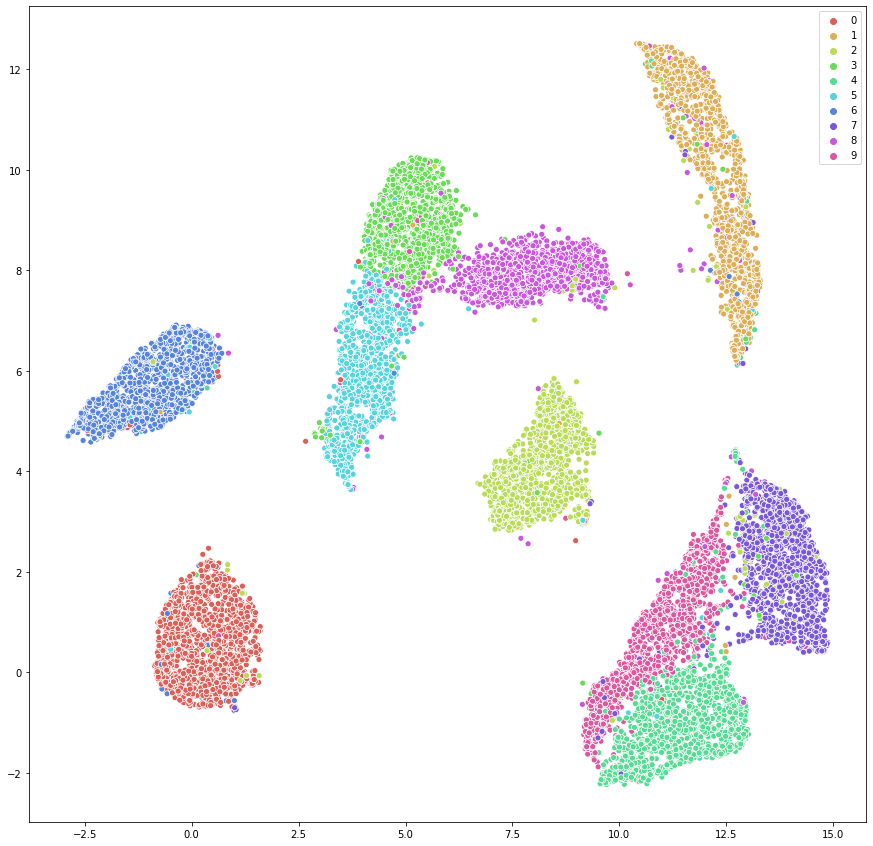

In [240]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,15))  
sns.scatterplot(x = embedding[:,0], y = embedding[:,1], hue =y_mnist, palette = sns.hls_palette(10), legend = 'full');


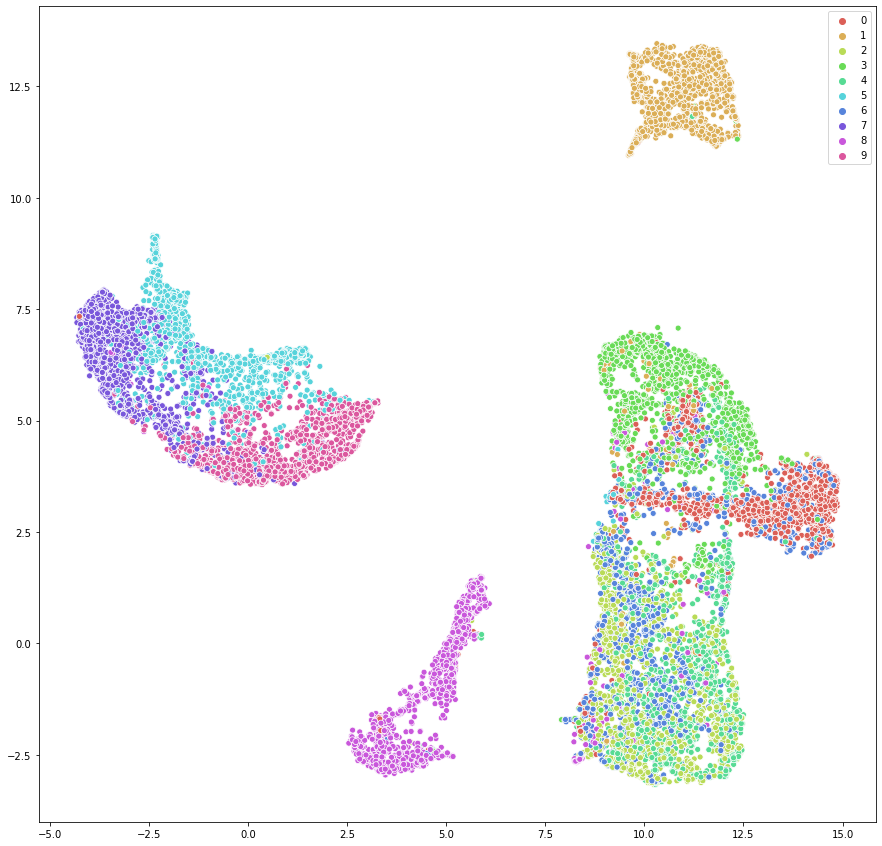

In [242]:
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(X_fmnist)

import seaborn as sns
fig, ax = plt.subplots(figsize=(15,15))  
sns.scatterplot(x = embedding[:,0], y = embedding[:,1], hue =y_fmnist, palette = sns.hls_palette(10), legend = 'full');


### Metoda LargeVis dla MNIST i f_MNIST:

For X_MNiST, the mapper (LargeVis) consistently records the global relationship between different digits from classes (3,5,8) and (4,7,9).

Methods for reading a dataset into the LargeVis method and back from a txt file:

In [52]:
def write_to_file(dataset, filename):
    import os
    os.system(f"echo {dataset.shape[0]} {dataset.shape[1]} > {filename}.txt")
    dataset.to_csv(f"{filename}.txt", index=False, sep=" ", mode="a", header=False)

def load_from_file(file_name):
    return pd.read_csv(file_name, delim_whitespace=True, skiprows=1, names=["1", "2"])

In [53]:
write_to_file(X_mnist, 'mnist_vis')
write_to_file(X_fmnist, 'fmnist_vis')

In [54]:
large_vis_mnist = load_from_file('out_vis/mnist_vis_out_plt.txt')
large_vis_fmnist = load_from_file('out_vis/fmnist_vis_out_plt.txt')


/Users/wikip/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


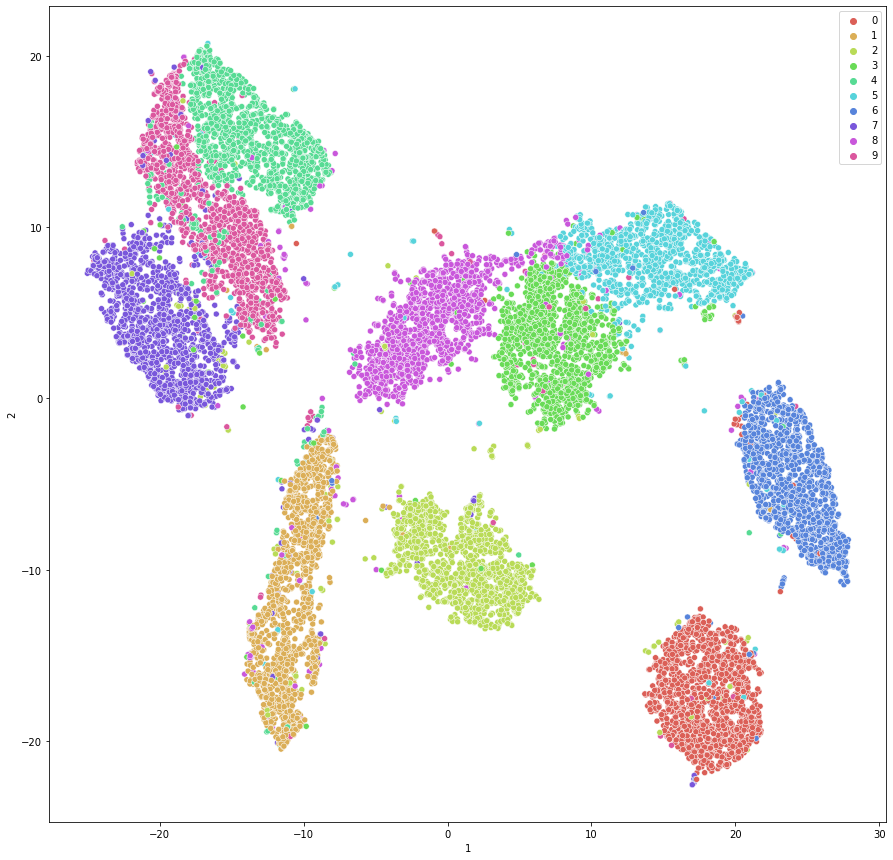

In [57]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,15))  
sns.scatterplot(large_vis_mnist['1'], large_vis_mnist['2'], hue =y_mnist.values, palette = sns.hls_palette(10), legend = 'full');

/Users/wikip/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


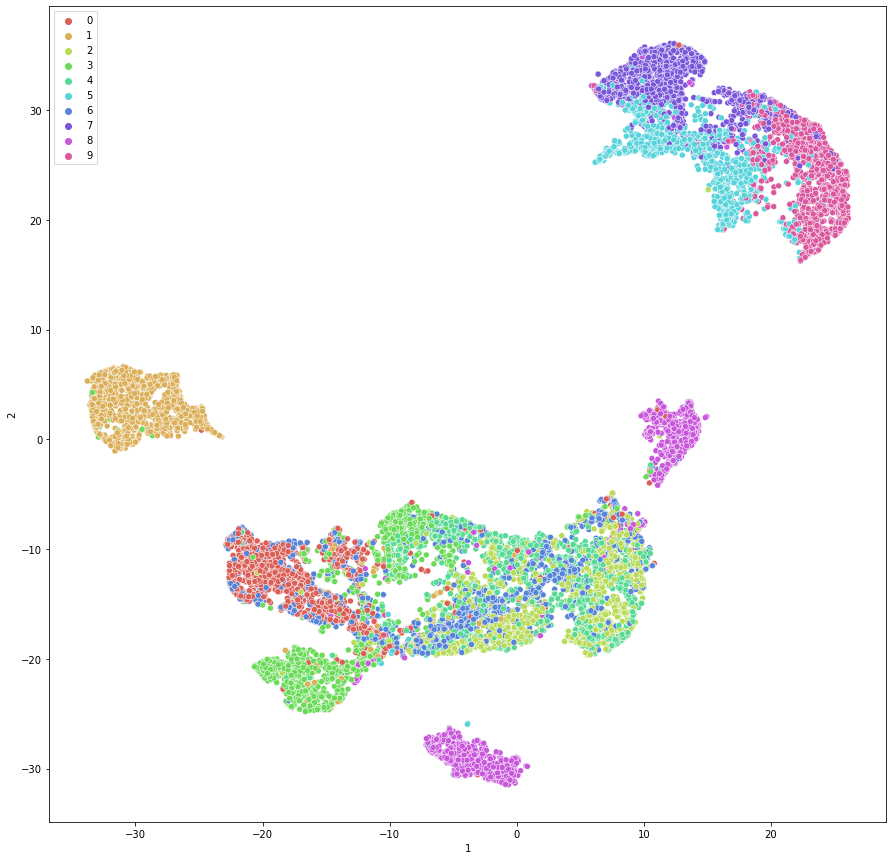

In [58]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,15))  
sns.scatterplot(large_vis_fmnist['1'], large_vis_fmnist['2'], hue =y_fmnist.values, palette = sns.hls_palette(10), legend = 'full');


In [ ]:
tsne = TSNE(n_components = 2, random_state=0)
tsne_res = tsne.fit_transform(mnist.data)

In [6]:
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(mnist.data)

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


## To compare the results from 3 methods: tsne, umap, largevis, a metric was implemented that expresses the ratio of the average distance between two points from the same class to the average distance between points from different classes.

In [197]:
from sklearn.preprocessing import StandardScaler
def get_metric(df):
    x_merge =  df
    distance_m = distance_matrix(x_merge.iloc[:,:-1],x_merge.iloc[:,:-1], p=2)
    
    distance_m = pd.DataFrame(data = distance_m, index = x_merge.index)

    distance_list = []
    for i in range(0, len(distance_m)):
        current_class = str(x_merge.iloc[i,-1])
        l = x_merge.loc[x_merge["label"]==current_class,:].index
        l = np.delete(l, np.argwhere(l == x_merge.index[i]))
        m = x_merge.loc[x_merge["label"]!=current_class,:].index

        distance_list.append(distance_m.loc[l ,i].mean()/distance_m.loc[m , i].mean())

    return sum(distance_list) / len(distance_list)

### Metric for oryginal MNIST dataset

Random 3500 points from MNIST(stratify will provide class proportions). To compare the metric value of each method, the inputs are standardized.

In [175]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist['target'], stratify= mnist['target'], test_size=0.95, random_state=42)

In [198]:
from sklearn import preprocessing
x_with_label =  pd.DataFrame(preprocessing.scale(X_train))
x_with_label["label"] = y_train
orginal_mnist_metric = get_metric(x_with_label)
orginal_mnist_metric 

0.8890805275430577

### Metric for TSNE MNIST:

In [199]:
# TSNE:
tsne = TSNE(n_components = 2, random_state=0)
tsne_res = tsne.fit_transform(preprocessing.scale(X_train))
tsne_metric =  get_metric(pd.DataFrame({'x': tsne_res[:,0],'y': tsne_res[:,1],'label': y_train}))
tsne_metric

0.4638918035536867

### Metric for UMAP MNIST:

In [200]:
# UMAP:
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(preprocessing.scale(X_train))
umap_metric =  get_metric(pd.DataFrame({'x': embedding[:,0],'y': embedding[:,1],'label': y_train}))
umap_metric

0.3477397813474576

#### Metric forLargeVis MNIST:

In [212]:
from sklearn import preprocessing
write_to_file(pd.DataFrame(preprocessing.scale(X_train)), 'mnist_viss.txt')
write_to_file(pd.DataFrame(preprocessing.scale(f_X_train)), 'fmnist_viss.txt')

In [218]:
vis_mnist = load_from_file('mnist_vis_out_mm.txt')
vis_metric =  get_metric(pd.DataFrame({'x': vis_mnist['1'],'y': vis_mnist['2'],'label': y_train}))
vis_metric

0.39473067284922075

Interpretation:
The calculated value of the metrics for each of the methods:
- oryginal MNIST:0.8890805275430577
- TSNE : 0.4638918035536867
- UMAP: 0.3477397813474576
- LargeVis: 0.39473067284922075

The UMAP method has the smallest value of the metric, we know from the fact that the distance between the observations belonging to one class is minimized as much as possible. On the other hand, the average distance of points from the different classes is probably greater than the other methods because the metric gave the smallest score. LargeVis had a slightly higher metric score, so distances from one class are likely to be minimized as well, but the denominator is smaller, meaning that the different classes are slightly less apart. The tsne method with the highest value says that the different classes are not as separeted as in other methods.

The above conclusions are clearly visible in the transformation plots.

### Metric for oryginal F_MNIST

Random 3500 points from FMNIST(stratify will provide class proportions). To compare the metric value of each method, the inputs are standardized.

In [202]:
f_X_train, f_X_test,f_y_train, f_y_test = train_test_split(fmnist.data, fmnist['target'], stratify= fmnist['target'], test_size=0.95, random_state=42)

In [219]:
from sklearn import preprocessing
x_with_label =  pd.DataFrame(preprocessing.scale(f_X_train))
x_with_label["label"] = f_y_train
orginal_fmnist_metric = get_metric(x_with_label)
orginal_fmnist_metric 

0.7792506182833692

#### Metric for TSNE f_MNIST:

In [223]:
# TSNE:
tsne = TSNE(n_components = 2, random_state=0)
tsne_res = tsne.fit_transform(preprocessing.scale(f_X_train))
f_tsne_metric =  get_metric(pd.DataFrame({'x': tsne_res[:,0],'y': tsne_res[:,1],'label': f_y_train}))
f_tsne_metric

0.39452216452438316

#### Metric forUMAP F_MNIST:

In [225]:
# UMAP:
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(preprocessing.scale(f_X_train))
f_umap_metric =  get_metric(pd.DataFrame({'x': embedding[:,0],'y': embedding[:,1],'label': f_y_train}))
f_umap_metric

0.33899444314901417

#### Metric for LargeVis F_MNIST:

In [227]:
f_vis_mnist = load_from_file('fmnist_vis_out_fm.txt')
f_vis_metric =  get_metric(pd.DataFrame({'x': f_vis_mnist['1'],'y': f_vis_mnist['2'],'label': f_y_train}))
f_vis_metric

0.43551599229549126

Interpretation:
The calculated values of the metrics for each of the methods are:
- pierwotny MNIST:0.7792506182833692
- TSNE : 0.39452216452438316
- UMAP: 0.33899444314901417
- LargeVis: 0.43551599229549126

The UMAP method again has the lowest metric value, so the separated classes should again be best visible on the plot. For the f_MNIST set, LargeVis did worse with class separation than TSNE.

The above conclusions are also well visible in the graphs for the f_MNISTA transformation.